Name :- Abhishek kushwaha
>Task 3: To train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.

*IMPORTING IMPORTANT LIBRARIES*

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

*IMPORTING DATASETS*


In [2]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df['species'],categories =pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]>

In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

*Data visualization*

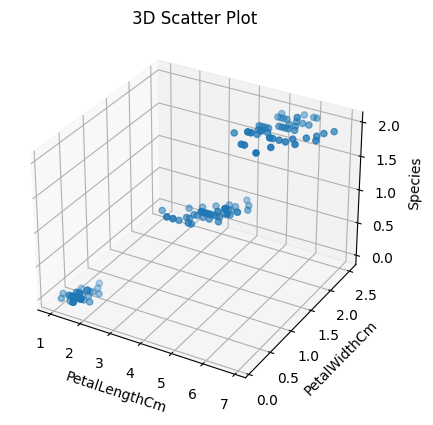

In [6]:
# it will 3-D Scatter plot for PatalLength
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
three_d = fig.add_subplot(111, projection='3d')
three_d.scatter(df.petal_length, df.petal_width, df.species)
three_d.set_xlabel('PetalLengthCm')
three_d.set_ylabel('PetalWidthCm')
three_d.set_zlabel('Species')
plt.title('3D Scatter Plot')
plt.show()

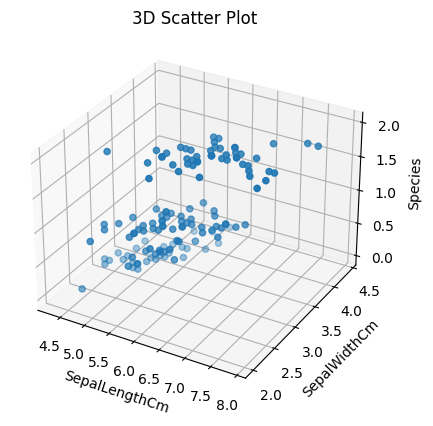

In [7]:
# it will 3-D Scatter plot for SepalLengthCm
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
three_d = fig.add_subplot(111, projection='3d')
three_d.scatter(df.sepal_length, df.sepal_width, df.species)
three_d.set_xlabel('SepalLengthCm')
three_d.set_ylabel('SepalWidthCm')
three_d.set_zlabel('Species')
plt.title('3D Scatter Plot')
plt.show()

***Scatter plot for the variables like sepal length and sepal width***

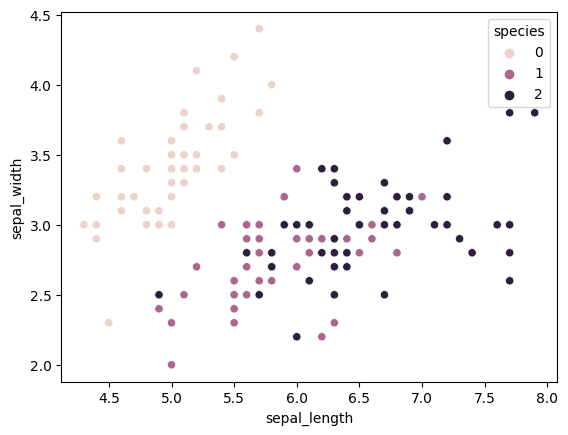

In [8]:
sns.scatterplot(data=df, x="sepal_length", y="sepal_width",hue="species");

***Scatter plot for the variables like petal length and petal width***

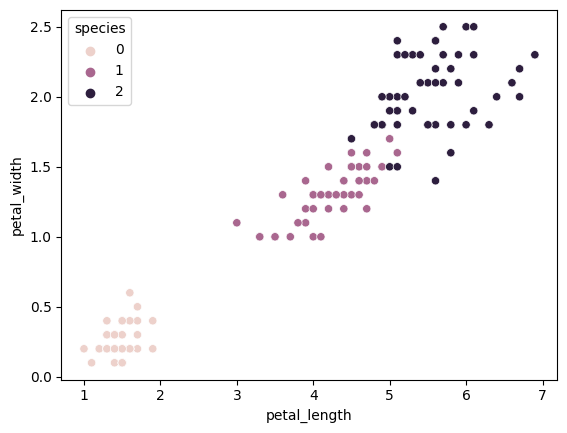

In [9]:
sns.scatterplot(data=df, x="petal_length", y="petal_width",hue="species");

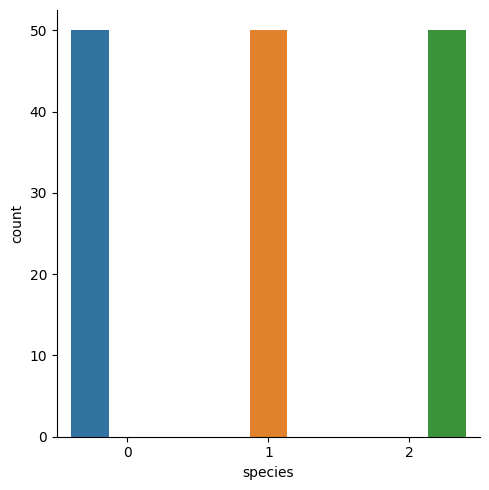

In [10]:
# it will display catpot
sns.catplot(x = 'species', hue = 'species', kind = 'count', data = df)

<BarContainer object of 150 artists>

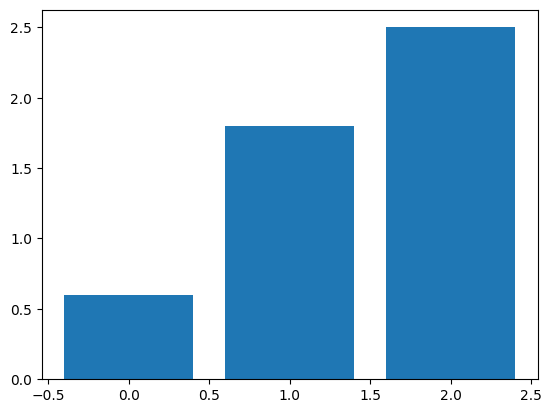

In [11]:
# It will display bar plot
plt.bar(df['species'],df['petal_width'])

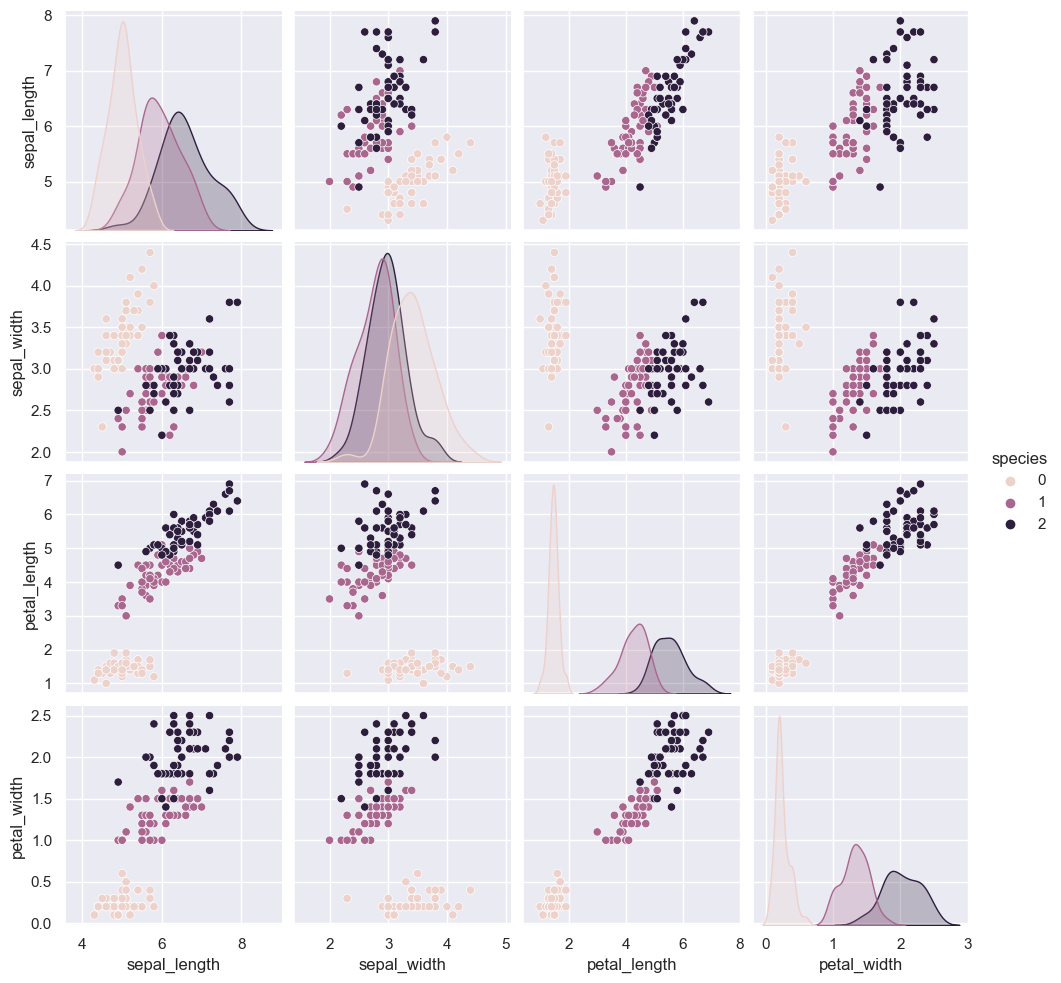

In [12]:
#Paired Plot
sns.set()
sns.pairplot(df[['sepal_length','sepal_width','petal_length','petal_width','species']], hue = "species", diag_kind="kde")

***Data processing***

In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [16]:
#dropping the 'species' column

X = df.drop(['species'], axis=1)

In [17]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


***Encoding the categorical feature as a one-hot numeric feature***

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
Label_Encode = LabelEncoder()
Y = df['species']
Y = Label_Encode.fit_transform(Y)

In [19]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

***Spliting the dataset***

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [21]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [22]:
X_train.shape

(120, 4)

In [23]:
X_test.shape

(30, 4)

In [24]:
Y_test.shape

(30,)

In [25]:
Y_train.shape

(120,)

****Model Preparation****

***KNN Algorithm***

In [26]:
#training the model

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler().fit(X_train)
X_train_std = standard_scaler.transform(X_train)
X_test_std = standard_scaler.transform(X_test)

In [27]:
X_train_std

array([[ 0.61303014,  0.10850105,  0.94751783,  0.73603967],
       [-0.56776627, -0.12400121,  0.38491447,  0.34808318],
       [-0.80392556,  1.03851009, -1.30289562, -1.3330616 ],
       [ 0.25879121, -0.12400121,  0.60995581,  0.73603967],
       [ 0.61303014, -0.58900572,  1.00377816,  1.25331499],
       [-0.80392556, -0.82150798,  0.04735245,  0.21876435],
       [-0.21352735,  1.73601687, -1.19037495, -1.20374277],
       [ 0.14071157, -0.82150798,  0.72247648,  0.47740201],
       [ 0.02263193, -0.12400121,  0.21613346,  0.34808318],
       [-0.09544771, -1.05401024,  0.10361279, -0.03987331],
       [ 1.0853487 , -0.12400121,  0.94751783,  1.12399616],
       [-1.39432376,  0.34100331, -1.41541629, -1.3330616 ],
       [ 1.20342834,  0.10850105,  0.72247648,  1.38263382],
       [-1.04008484,  1.03851009, -1.24663528, -0.81578628],
       [-0.56776627,  1.50351461, -1.30289562, -1.3330616 ],
       [-1.04008484, -2.4490238 , -0.1776889 , -0.29851096],
       [ 0.73110978, -0.

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [29]:
predict_knn=knn.predict(X_test_std)
accuracy_knn=accuracy_score(Y_test,predict_knn)*100

In [30]:
accuracy_knn

100.0

**Applying KMean Algorithm**

In [31]:
km = KMeans(n_clusters=3,random_state=0,)
y_predicted = km.fit_predict(df[['petal_length','petal_width']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [32]:
df['cluster']=y_predicted
df.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1


Accuracy measure

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df.species, df.cluster)
cm

array([[50,  0,  0],
       [ 0,  2, 48],
       [ 0, 46,  4]], dtype=int64)

In [34]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Generate synthetic data for demonstration
X, y_true = make_blobs(n_samples=300, centers=3, random_state=0)

# Fit K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X)

# Calculate Adjusted Rand Index (ARI)
ari = adjusted_rand_score(y_true, labels)
print(f"Adjusted Rand Index: {ari}")

# Calculate Normalized Mutual Information (NMI)
nmi = normalized_mutual_info_score(y_true, labels)
print(f"Normalized Mutual Information: {nmi}")


Adjusted Rand Index: 0.7667434002939801
Normalized Mutual Information: 0.7022606811801029


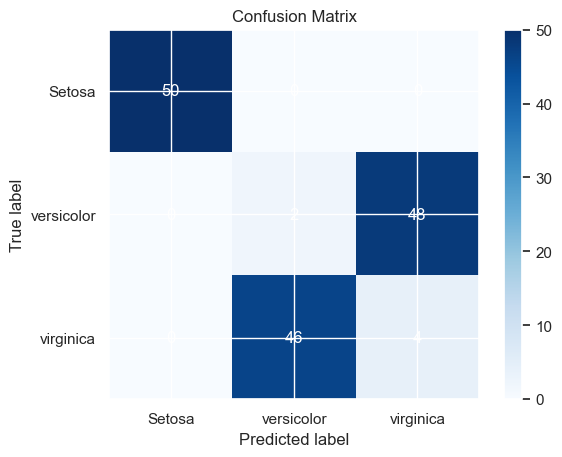

In [35]:
true_labels = df.species
predicted_labels= df.cluster

cm = confusion_matrix(true_labels, predicted_labels)
class_labels = ['Setosa', 'versicolor', 'virginica']

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Fill matrix with values
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='white')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()



**Decision Tree**

In [36]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [37]:
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [38]:
# print metric to get performance
print("Accuracy: ",decision_tree.score(X_test, Y_test) * 100)

Accuracy:  100.0


**Model Deployment**

In [39]:
# Decision Tree
result=decision_tree.predict([[5.9,	3.0,5.1,1.8	]])
print("The Predicted Index value for Species  : ",result[0])

The Predicted Index value for Species  :  2


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [40]:
# KNN Model
result=knn.predict([[5.9,3.0,5.1,1.9]])
print("The Predicted Index value for Species  : ",result[0])

The Predicted Index value for Species  :  2


# Note :- The Predicted Index value for Species mean we have to look corresponding species e.g if output is 2 then Species will be Iris-setosa. 